In [1]:
# convert the hexagonal grid to square images

In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
import awkward as ak

In [165]:
from matplotlib.patches import Patch
from matplotlib.patches import RegularPolygon

In [292]:
def getNcols(N=3, cmap_='plasma'):
    cmap = plt.get_cmap(cmap_)
    cols = cmap.colors
    arr = []
    for i in range(N):
        arr.append(cols[int(256*float(i)/float(N))])
    return arr

In [2]:
input_file = "/home/rusack/shared/hdf5/hgcal_electron/hgcal_electron_data_test.h5"
h5 = h5py.File(input_file)

In [426]:
nhits = np.asarray(h5['nhits'], dtype=int)
rechit_x = ak.unflatten(np.asarray(h5['rechit_x'], dtype='float32'), nhits)
rechit_y = ak.unflatten(np.asarray(h5['rechit_y'], dtype='float32'), nhits)
rechit_z = ak.unflatten(np.asarray(h5['rechit_z'], dtype='float32'), nhits)

In [421]:
rechit_energy = ak.unflatten(np.asarray(h5['rechit_energy'], dtype='float32'), nhits)

In [85]:
z_pos = np.unique(np.asarray(h5['rechit_z']))
x_pos = np.unique(np.asarray(h5['rechit_x']))
y_pos = np.unique(np.asarray(h5['rechit_y']))

In [5]:
first_x = rechit_x[rechit_z==z_pos[0]]
first_y = rechit_y[rechit_z==z_pos[0]]
first_x_ticks = np.unique(np.asarray(ak.flatten(first_x)))
first_y_ticks = np.unique(np.asarray(ak.flatten(first_y)))

In [233]:
(abs(h5['rechit_x']-x_pos[0])<1e-3)*1.0

array([0., 0., 0., ..., 0., 0., 0.])

In [124]:
dx = np.diff(x_pos)[0]
dy = np.diff(y_pos)[0]

In [125]:
d = np.sqrt(dy**2+dx**2)
dx = dx/d
dy = dy/d

In [138]:
np.sqrt((3*(dx**2)-(dy**2))/2)

3.1410831605302807

In [29]:
xy = ak.zip((np.asarray(h5['rechit_x']), np.asarray(h5['rechit_y'])))
grid = np.unique(np.asarray(xy))

In [244]:
rechit_u = np.array(list(map(lambda x: 2*(x["0"]/d)/sqtr, xy))).astype('float32')
rechit_v = np.array(list(map(lambda x: (x["1"]/d)-(x["0"]/d)/sqtr, xy))).astype('float32')

In [245]:
rechit_u = ak.unflatten(rechit_u, nhits)
rechit_v = ak.unflatten(rechit_v, nhits)

<Array [-1.94, 0, -1.94, ... -4.86, -3.89] type='1115 * float64'>

In [436]:
d

1.1220959888872364

In [253]:
A = [ rechit_u[0][rechit_z[0]==z_pos[l]] for l in range(len(z_pos)) ]
B = [ rechit_v[0][rechit_z[0]==z_pos[l]] for l in range(len(z_pos)) ]
E = [ rechit_energy[0][rechit_z[0]==z_pos[l]] for l in range(len(z_pos)) ]

In [273]:
max([max(E[l]) for l in len(E)]

In [303]:
colarray = getNcols(9)

In [328]:
rechit_cindex = np.floor(np.log(rechit_energy[0]))+1

In [329]:
sensor_density = [ rechit_cindex[rechit_z[0]==z_pos[l]] for l in range(len(z_pos)) ]

/tmp/ipykernel_2905802/2828400260.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  hexagon = RegularPolygon((a[ic], b[ic]), numVertices=4, edgecolor='none',
/tmp/ipykernel_2905802/2828400260.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

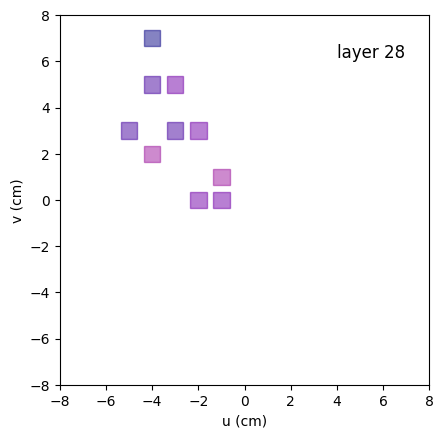

In [336]:
# generate hexagonal grid with sensor as the center
l = -1
for a, b in zip(A,B):
    l += 1
    plt.clf()
    fig, ax = plt.subplots(1)
    fig.figsize = (6.6, 6.6)
    ax.set_aspect('equal')
    for ic, c in enumerate(a):

        # fix radius here
        hexagon = RegularPolygon((a[ic], b[ic]), numVertices=4, edgecolor='none',
                                 radius=0.5, alpha=0.5, color=colarray[int(sensor_density[l][ic])], orientation=np.pi/4)
        ax.add_patch(hexagon)
    plt.xlim([-8, 8])
    plt.ylim([-8, 8])
    plt.xlabel('u (cm)')
    plt.ylabel('v (cm)')
    energy_text = plt.text(x=4, y=6, s="layer {}".format(l+1),
    fontsize=12,
    fontfamily='sans-serif',
    horizontalalignment='left', 
    verticalalignment='bottom')
    plt.savefig('event_layer_{}.png'.format(l))

<img src="event_display.gif" width="400" align="center">

In [78]:
rndw = np.zeros(grid.shape[0])
for i in range(grid.shape[0]):
    rndw[i] = np.random.rand()

In [140]:
grid_x = np.array(list(map(lambda x: x[0], grid))).astype('float32')
grid_y = np.array(list(map(lambda x: x[1], grid))).astype('float32')

In [141]:
norm_grid_x = grid_x/d
norm_grid_y = grid_y/d

In [144]:
sqt = np.sqrt(2)
sqtr = np.sqrt(3)

In [206]:
#grid_u = np.array(list(map(lambda x: (x[0]/d)/sqtr-(x[1]/d), grid))).astype('float32')
#grid_v = np.array(list(map(lambda x: (x[1]/d)+(x[0]/d)/sqtr, grid))).astype('float32')

In [228]:
grid_u = np.array(list(map(lambda x: 2*(x[0]/d)/sqtr, grid))).astype('float32')
grid_v = np.array(list(map(lambda x: (x[1]/d)-(x[0]/d)/sqtr, grid))).astype('float32')

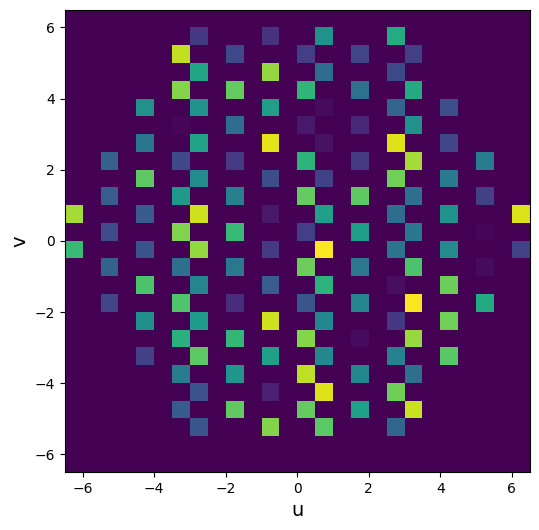

In [186]:
plt.figure(figsize=(6,6))
plt.hist2d(norm_grid_x, norm_grid_y, weights=rndw, bins=(26,26), range=((-6.5,6.5),(-6.5,6.5)))
plt.xlabel('u', fontsize=14)
plt.ylabel('v', fontsize=14)
plt.show()

<Figure size 640x480 with 0 Axes>

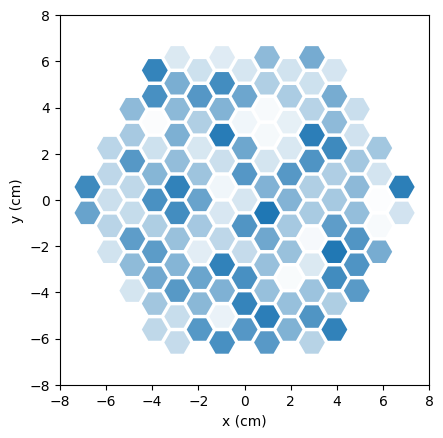

In [323]:
sensor_density = rndw/rndw.max()
# generate hexagonal grid with sensor as the center
plt.clf()
fig, ax = plt.subplots(1)
fig.figsize = (6.6, 6.6)
ax.set_aspect('equal')

for ic, c in enumerate(grid):
    # fix radius here
    hexagon = RegularPolygon((c['0'], c['1']), numVertices=6, edgecolor='none',
                             radius=d/2, alpha=sensor_density[ic], orientation=np.pi/6)
    ax.add_patch(hexagon)
plt.xlim([-8, 8])
plt.ylim([-8, 8])
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.savefig('xy_first_layer.png')

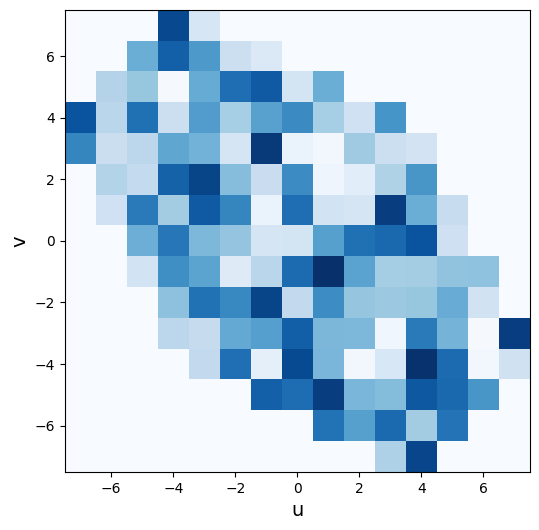

In [399]:
plt.figure(figsize=(6,6))
h_ = plt.hist2d(grid_u, grid_v, weights=rndw, bins=(15,15), range=((-7.5,7.5),(-7.5,7.5)), cmap='Blues')
plt.xlabel('u', fontsize=14)
plt.ylabel('v', fontsize=14)
plt.savefig('uv_first_layer.png')

In [348]:
h_ = np.histogram2d(grid_u, grid_v, weights=rndw)[0]

In [427]:
ptcloud = ak.zip((rechit_u, rechit_v, rechit_z, rechit_energy))

In [432]:
img = list(map(lambda x: np.array([np.histogram2d(np.array(x[x["2"]==l]["0"], dtype='float32'), np.array(x[x["2"]==l]["1"], dtype='float32'), bins=(15,15), range=((-7.5,7.5),(-7.5,7.5)), weights=np.array(x[x["2"]==l]["3"]))[0] for l in z_pos]), ptcloud))

In [435]:
np.array(img).T.shape

(15, 15, 28, 10)

In [401]:
h_[0].shape

(15, 15)